# General Deep Learning Methods(ANN-CNN-RNN-LSTM)

  1. Artificial Neural Network(ANN)

    * 📌 Neural networks, also known as artificial neural networks (ANN) or simulated neural networks (SNN), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.
  
  2. Convolution Neural Network(CNN)

    * 📌 A convolutional neural network (CNN) is a type of artificial neural network used primarily for image recognition and processing, due to its ability to recognize patterns in images. A CNN is a powerful tool but requires millions of labelled data points for training.
  
  3. Recurrent Neural Network(RNN)

    * 📌 A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes can create a cycle, allowing output from some nodes to affect subsequent input to the same nodes. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable-length sequences of inputs.
  
  4. Long Short Term Memory(LSTM)

    * 📌 Long short-term memory (LSTM)[1] is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network (RNN) can process not only single data points (such as images) but also entire sequences of data (such as speech or video). This characteristic makes LSTM networks ideal for processing and predicting data.


# Artificial Neural Network(ANN)

## Business Problem

📌 Handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can vary from person to person. Handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

## Dataset Story

📌 MNIST is a widely used dataset of handwritten digits that contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model.The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value. It was introduced in 1998 and has become a standard benchmark for classification tasks. 

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png" width="500" height="300"/>

## Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

## General Information About to the Dataset

In [ ]:
def check_df(X_train, y_train, X_test, y_test):
  print("######################### Shape of Train #########################")
  print("X_train Shape: {0}  y_train Shape: {1}".format(X_train.shape, y_train.shape))
  print("######################### Shape of Test #########################")
  print("X_test Shape: {0}  y_test Shape: {1}".format(X_test.shape, y_test.shape))
  print("######################### Number of Labels #########################")
  print("Number of Labels: ", len(np.unique(y_train)))
  num_labels = len(np.unique(y_train))

  return num_labels

In [ ]:
num_labels = check_df(X_train, y_train, X_test, y_test)

######################### Shape of Train #########################
X_train Shape: (60000, 28, 28)  y_train Shape: (60000,)
######################### Shape of Test #########################
X_test Shape: (10000, 28, 28)  y_test Shape: (10000,)
######################### Number of Labels #########################
Number of Labels:  10


## Visulization Image

In [ ]:
def visualize_img(data, num_of_img=10):
  plt.figure(figsize=(10,10))
  for n in range(num_of_img):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap="gray")
    plt.axis("off")

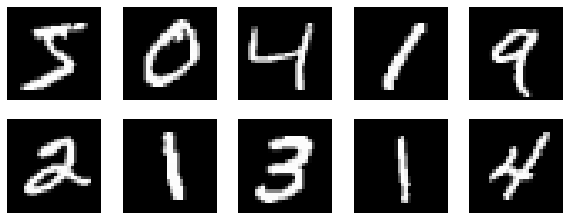

In [ ]:
visualize_img(X_train)

In [ ]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap="gray")
  width, height = img.shape
  threshold = img.max() / 2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy=(y,x), color="white" if img[x][y]<threshold else "black")

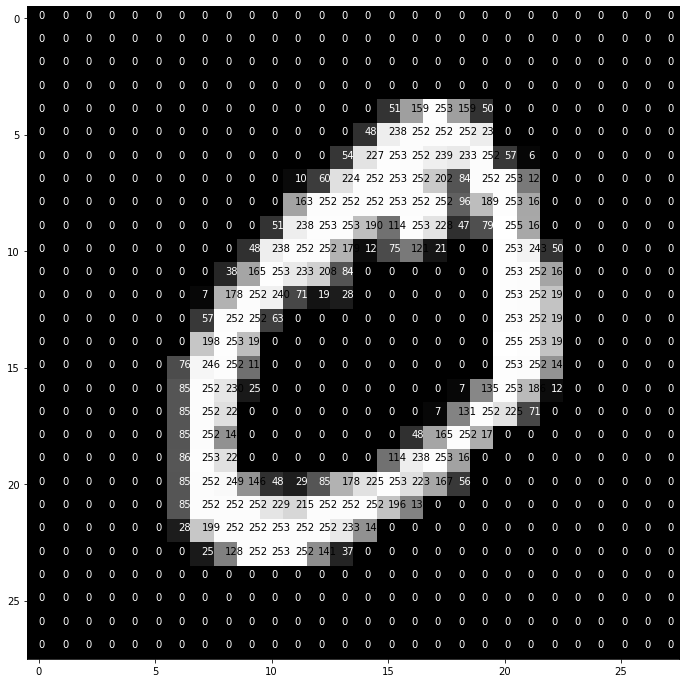

In [ ]:
pixel_visualize(X_train[1])

## Data Preparation

In [ ]:
def data_preparation(X_train,y_train, X_test, y_test):
  # Encoding
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  # Reshaping
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

  # Standardization
  X_train = X_train.astype("float32") / X_train.max()
  X_test = X_test.astype("float32") / X_test.max()

  return X_train, y_train, X_test, y_test


In [ ]:
X_train, y_train, X_test, y_test = data_preparation(X_train, y_train, X_test, y_test)

## Modeling

In [ ]:
def create_and_fit_model(X_train, y_train, X_test, y_test, summary=True, fit=True, epochs=10, batch_size=128):
  model = tf.keras.Sequential([
      Flatten(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
      Dense(units=128, activation="relu", name="layer_1"),
      Dense(units=num_labels, activation="softmax", name="output_layer")
  ])
  model.compile(loss="categorical_crossentropy", 
                optimizer="adam", 
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

  if summary:
    model.summary()
  
  if fit:
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
  
  return model, history

In [ ]:
model, history = create_and_fit_model(X_train, y_train, X_test, y_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 0.3623 - precision_9: 0.9474 - recall_9: 0.8468 - accuracy: 0.9014 - val_loss: 0.1911 - val_precision_9: 0.9582 - val_recall_9: 0.9328 - val_accuracy: 0.9441
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1656

## Evaluation

In [ ]:
def model_evaluate(model):
  loss, precision, recall, acc = model.evaluate(X_test, y_test, verbose=False)
  print("Test Accuracy: %.2f" % (100 * acc))
  print("Test Loss: %.2f" % (100 * loss))
  print("Test Precision: %.2f" % (100 * precision))
  print("Test Recall: %.2f" % (100 * recall))

  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  plt.plot(history.history["accuracy"], color="r", label="Training Accuracy")
  plt.plot(history.history["val_accuracy"], color="b", label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.xlabel("Epoch", fontsize=16)
  plt.ylabel("Accuracy", fontsize=16)
  plt.ylim([min(plt.ylim()),1])
  plt.title("Training and Test Performance Graphic", fontsize=16)

  plt.subplot(1,2,2)
  plt.plot(history.history["loss"], color="r", label="Training Loss")
  plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
  plt.legend(loc="upper right")
  plt.xlabel("Epoch", fontsize=16)
  plt.ylabel("Loss", fontsize=16)
  plt.ylim([0, max(plt.ylim())])
  plt.title("Training and Test Loss Graphic", fontsize=16)

Test Accuracy: 97.87
Test Loss: 6.72
Test Precision: 98.07
Test Recall: 97.73


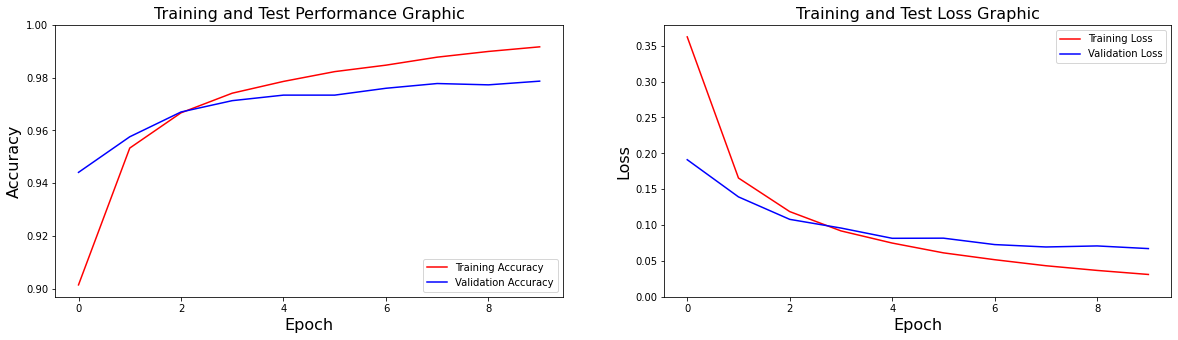

In [ ]:
model_evaluate(model)

## Saving the Model and Using it for Prediction

In [ ]:
def save_and_predict_model(model):
  model.save("my_model.h5")
  import random
  random_number = random.randint(0, X_test.shape[0])
  test_img = X_test[random_number]
  plt.imshow(test_img.reshape(X_test.shape[1],X_test.shape[2]),cmap="gray")
  test_data = X_test[random_number].reshape(1,X_test.shape[1],X_test.shape[2],1)
  probability = model.predict(test_data)
  predicted_class = np.argmax(probability)
  print("Predicted Class: ", predicted_class)
  print("Probability Value of the Predicted Class: ", np.max(probability, axis=-1))
  print("Probability value of the predicted class: ", probability)

1/1 [==============================] - 0s 22ms/step
Predicted Class:  0
Probability Value of the Predicted Class:  [0.99999917]
Probability value of the predicted class:  [[9.9999917e-01 1.5258954e-12 1.1296272e-09 7.1214017e-09 3.3635189e-10
  2.9071614e-07 8.0915856e-12 2.8108229e-07 9.0248981e-10 1.7982762e-07]]


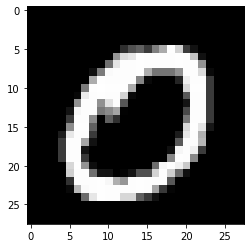

In [ ]:
save_and_predict_model(model)

# Convolution Neural Network(CNN)

## Business Problem

📌 Garbage disposal is a huge problem in today’s world. As the population grows, the waste generated increases and proper treatment and disposal of the generated waste is important to ensure negligible, if not no harm to the environment.

📌 In this section, we will be classifying the recyclable products into categories based on their materials. This sorting is necessary because each material has its own recycling treatments and procedures.

## Dataset Story

📌 The Garbage Classification Dataset contains 6 classifications: cardboard (393), glass (491), metal (400), paper(584), plastic (472) and trash(127).

Example pictures for each category are shown below:

<img src="https://miro.medium.com/max/750/1*qqNAfmUJ986mFWDChGlWQQ.webp" width="500" height="600"/>

## Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import urllib
import itertools
import random, os, glob
from imutils import paths
from sklearn.utils import shuffle
from urllib.request import urlopen

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

## Import Dataset

In [ ]:
dir_path = "/content/drive/MyDrive/Colab Notebooks/datasets/Garbage classification"

In [ ]:
target_size = (224, 224)
waste_labels = {"cardboard":0, "glass":1, "metal":2, "paper":3, "plastic":4, "trash":5}

In [ ]:
def load_dataset(path):
  x = []
  labels = []
  image_paths = sorted(list(paths.list_images(path)))
  for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    x.append(img)
    label = image_path.split(os.path.sep)[-2]
    labels.append(waste_labels[label])
  x, labels = shuffle(x, labels, random_state=42)
  input_shape = (np.array(x[0]).shape[1], np.array(x[0]).shape[1], 3)
  print("X shape: ", np.array(x).shape)
  print(f"Number of Labels: {len(np.unique(labels))} , Number of Observation: {len(labels)}")
  print("Input Shape: ", input_shape)
  return x, labels, input_shape

In [ ]:
x, labels, input_shape = load_dataset(dir_path)

X shape:  (2527, 224, 224, 3)
Number of Labels: 6 , Number of Observation: 2527
Input Shape:  (224, 224, 3)


## Visulization Image

In [ ]:
def visualizeation_img(image_batch, labels, num_of_img):
  plt.figure(figsize=(10,10))
  for n in range(num_of_img):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(np.array(list(waste_labels.keys()))[to_categorical(labels, num_classes=len(np.unique(labels)))[n] == 1][0].title())
    plt.axis("off")

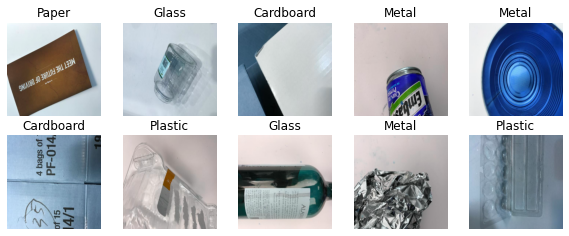

In [ ]:
visualizeation_img(x, labels, 10)

In [ ]:
def CNN_data_preparation():
  train = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.1,
                             rescale=1./255,
                             shear_range=0.1,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
  test = ImageDataGenerator(rescale=1/255, validation_split=0.1)
  train_generator = train.flow_from_directory(directory=dir_path,
                                              target_size=(target_size),
                                              class_mode="categorical",
                                              subset="training")
  test_generator = test.flow_from_directory(directory=dir_path,
                                            target_size=(target_size),
                                            batch_size=251,
                                            class_mode="categorical",
                                            subset="validation")
  return train_generator, test_generator

In [ ]:
train_generator, test_generator = CNN_data_preparation()

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


## Modeling

In [ ]:
def CNN_create_and_fit_model(train_generator, test_generator, summary=True, fit=True, epochs=100):
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", input_shape=(input_shape), activation="relu"))
  model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

  model.add(Flatten())

  model.add(Dense(units=64, activation="relu"))
  model.add(Dropout(rate=0.2))

  model.add(Dense(units=32, activation="relu"))
  model.add(Dropout(rate=0.2))

  model.add(Dense(units=6, activation="softmax"))

  model.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "acc"])

  callbacks = [EarlyStopping(monitor="val_loss", patience=50, verbose=1, mode="min"), 
              ModelCheckpoint(filepath="mymodel.h5", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=False, verbose=1)]
  
  if summary:
    model.summary()
  
  if fit:
    history = model.fit_generator(generator=train_generator, epochs=epochs, validation_data=test_generator, 
                                callbacks=callbacks, workers=4, steps_per_epoch=10, validation_steps=251//32) # steps_per_epoch=2276//32, validation_steps=251//32
                                                                                                              # you can choose 2276/32 is 71 per epoch for best accuracy

  return model, history

In [ ]:
model, history = CNN_create_and_fit_model(train_generator, test_generator)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 32)      

## Evaluation

In [ ]:
def CNN_model_evaluate(model):
  loss, precision, recall, acc = model.evaluate(test_generator, batch_size=32)
  print("Test Accuracy: %.2f" % (100 * acc))
  print("Test Loss: %.2f" % (100 * loss))
  print("Test Precision: %.2f" % (100 * precision))
  print("Test Recall: %.2f" % (100 * recall))

  X_test, y_test = test_generator.next()
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)
  target_names = list(waste_labels.keys())
  print(classification_report(y_test, y_pred, target_names=target_names))

  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  plt.plot(history.history["acc"], color="r", label="Training Accuracy")
  plt.plot(history.history["val_acc"], color="b", label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.xlabel("Epoch", fontsize=16)
  plt.ylabel("Accuracy", fontsize=16)
  plt.ylim([min(plt.ylim()),1])
  plt.title("Training and Validation Accuracy", fontsize=16)

  plt.subplot(1,2,2)
  plt.plot(history.history["loss"], color="r", label="Training Loss")
  plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
  plt.legend(loc="upper right")
  plt.xlabel("Epoch", fontsize=16)
  plt.ylabel("Loss", fontsize=16)
  plt.ylim([0, max(plt.ylim())])
  plt.title("Training and Validation Loss", fontsize=16)

  return y_test, y_pred

1/1 [==============================] - 5s 5s/step - loss: 1.0808 - precision_2: 0.7851 - recall_2: 0.3785 - acc: 0.5618
Test Accuracy: 56.18
Test Loss: 108.08
Test Precision: 78.51
Test Recall: 37.85
8/8 [==============================] - 4s 541ms/step
              precision    recall  f1-score   support

   cardboard       0.86      0.62      0.72        40
       glass       0.50      0.54      0.52        50
       metal       0.49      0.56      0.52        41
       paper       0.54      0.88      0.67        59
     plastic       0.57      0.17      0.26        48
       trash       0.55      0.46      0.50        13

    accuracy                           0.56       251
   macro avg       0.58      0.54      0.53       251
weighted avg       0.58      0.56      0.54       251



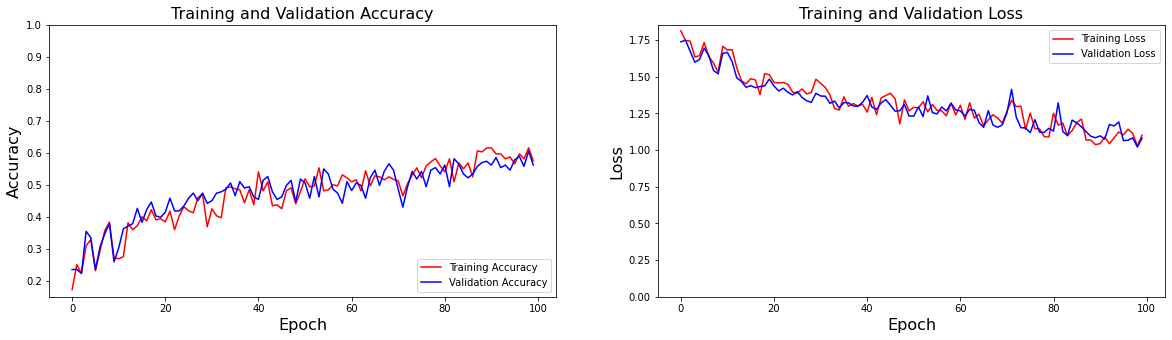

In [ ]:
y_test, y_pred = CNN_model_evaluate(model)

## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.OrRd):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  
  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = ".2f" if normalize else "d"
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True Labels", fontweight="bold")
  plt.xlabel("Predicted Labels", fontweight="bold")

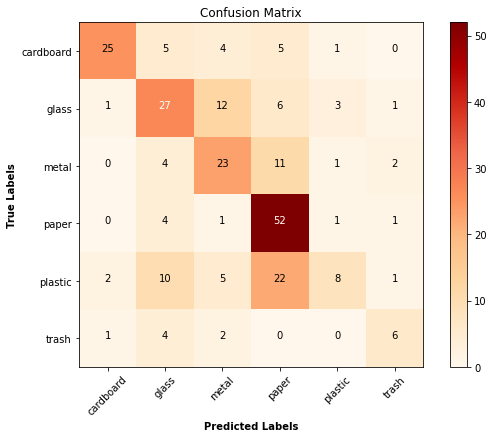

In [ ]:
plot_confusion_matrix(cm, waste_labels.keys())

## Model Testing

In [ ]:
def CNN_model_testing(path):
  img = image.load_img(path, target_size=(target_size))
  img = image.img_to_array(img, dtype=np.uint8)
  img = np.array(img)/255.0
  p = model.predict(img.reshape(1,224,224,3))
  predicted_class = np.argmax(p[0])
  return img, p, predicted_class

In [ ]:
img, p, predicted_class = CNN_model_testing("/content/drive/MyDrive/Colab Notebooks/datasets/Garbage classification/metal/metal100.jpg")

1/1 [==============================] - 0s 77ms/step


In [ ]:
waste_labels = {0:"cardboard", 1:"glass", 2:"metal", 3:"paper", 4:"plastic", 5:"trash"}
def plot_model_testing(img, p, predicted_class):
  plt.axis("off")
  plt.imshow(img.squeeze())
  plt.title("Maximum Probabilty: " + str(np.max(p[0], axis=-1)) + "\n" + "Predicted Class: " + str(waste_labels[predicted_class]))
  plt.imshow(img);

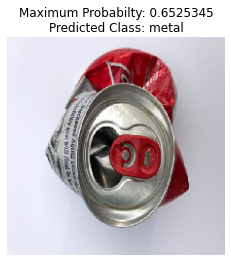

In [ ]:
plot_model_testing(img, p, predicted_class)

# Recurrent Neural Network(RNN)

## Business Problem

📌 In this section, we estimate the number of passengers in the coming years by examining the number of passengers in the past years.

## Dataset Story

📌 This dataset contains how many passengers traveled monthly from 1949 to 1960.

**Month:** the date in the month is a variable.

**Passengers:** estimates the number of passengers per month.

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
import datetime as dt
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Import Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/AirPassengers.csv")
df.columns = ["Month", "Passengers"]
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## General Information About to the Dataset

In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

######################### Head #########################
     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
######################### Tail #########################
       Month  Passengers
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432
######################### Shape #########################
(144, 2)
######################### Types #########################
Month         object
Passengers     int64
dtype: object
######################### NA #########################
Month         0
Passengers    0
dtype: int64
######################### Qurtiles #########################
            count        mean         std    min     0%     5%    50%     95%     99%   100%    max
Passengers  144.0  280.298611  119.966317  104.0  104.0  121.6  265.5  488.15  585.79  622.0  622.0


## Data Preparation

In [5]:
df["Month"] = pd.to_datetime(df["Month"])
df.index = df["Month"]
df.drop("Month", axis=1, inplace=True)
data = df["Passengers"].values
data = data.astype("float32")
data = data.reshape(-1,1)

In [6]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
data[0:5]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [8]:
data.shape

(144, 1)

## Data Visualization

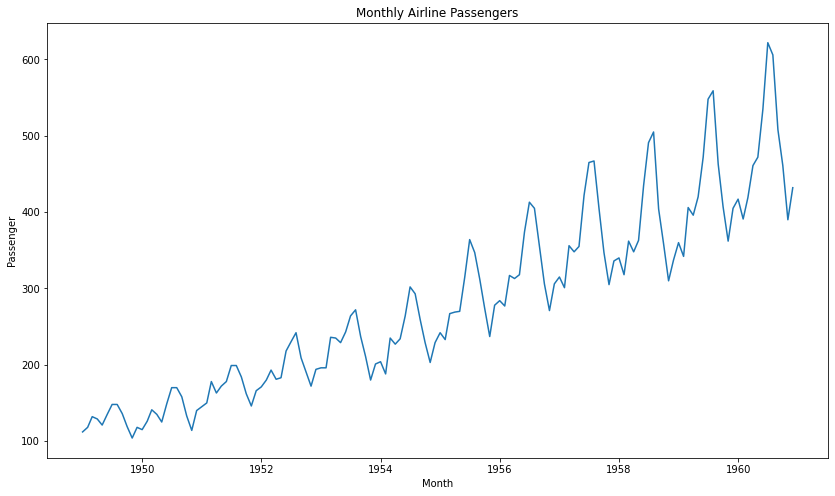

In [9]:
plt.figure(figsize=(14,8))
plt.plot(df)
plt.title("Monthly Airline Passengers")
plt.xlabel("Month")
plt.ylabel("Passenger");

## Train and Test Split

In [28]:
def split_data(dataframe, test_size):
  position = int(round(len(dataframe) * (1-test_size)))
  train = dataframe[:position]
  test = dataframe[position:]
  return train, test, position

In [29]:
train, test, position = split_data(df, 0.33)
print("Train shape:", train.shape, " Test shape:", test.shape)

Train shape: (96, 1)  Test shape: (48, 1)


## Encoding Scaling

In [30]:
def encoding_scaling(train, test):
  scaler_train = MinMaxScaler(feature_range=(0,1))
  train = scaler_train.fit_transform(train)
  scaler_test = MinMaxScaler(feature_range=(0,1))
  test = scaler_test.fit_transform(test)
  return scaler_train, train, scaler_test, test

In [31]:
scaler_train, train, scaler_test, test  = encoding_scaling(train, test)

## Create Features

In [32]:
def create_features(data, lookback):
  X, Y = [], []
  for i in range(lookback, len(data)):
    X.append(data[i-lookback:i,0])
    Y.append(data[i,0])
  return np.array(X), np.array(Y)

In [33]:
X_train, y_train = create_features(train, 1)
X_test, y_test = create_features(test, 1)
print("X_train shape:", X_train.shape, " y_train shape:", y_train.shape, "\nX_test shape:", X_test.shape, " y_test shape: ", y_test.shape)

X_train shape: (95, 1)  y_train shape: (95,) 
X_test shape: (47, 1)  y_test shape:  (47,)


## RNN Data Format

In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print("X_train shape:", X_train.shape, " y_train shape:", y_train.shape, "\nX_test shape:", X_test.shape, " y_test shape: ", y_test.shape)

X_train shape: (95, 1, 1)  y_train shape: (95, 1) 
X_test shape: (47, 1, 1)  y_test shape:  (47, 1)


## Modeling

In [35]:
def RNN_create_and_fit_model(X_train,y_train, X_test, y_test, lookback=1, epochs=50, summary=True, fit=True):
  model = Sequential()
  model.add(SimpleRNN(units=50, activation="relu", input_shape=(X_train.shape[1], lookback)))
  model.add(Dropout(0.2))
  model.add(Dense(1))

  model.compile(loss="mean_squared_error", optimizer="adam")
  callbacks = [EarlyStopping(monitor="val_loss", patience=3, verbose=1, mode="min"), 
              ModelCheckpoint(filepath="mymodel.h5", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=False, verbose=1)]
  
  if summary:
    model.summary()
  
  if fit:
    history = model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=1, 
                      validation_data=(X_test, y_test), callbacks=callbacks, shuffle=False)
  
  return model, history

In [36]:
model, history = RNN_create_and_fit_model(X_train,y_train, X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
83/95 [=========================>....] - ETA: 0s - loss: 0.0096
Epoch 1: val_loss improved from inf to 0.03473, saving model to mymodel.h5
95/95 [==============================] - 1s 5ms/step - loss: 0.0110 - val_loss: 0.0347
Epoch 2/50
94/95 [============================>.] - ETA: 0s - loss: 0.0141
Epoc

## Evaluation

In [37]:
def RNN_model_evaluate(model):
  loss = model.evaluate(X_test, y_test, batch_size=1)
  print("Test Loss: %.2f" % (100 * loss))
  plt.figure(figsize=(10,5))
  plt.plot(history.history["loss"], color="r", label="Training Loss")
  plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
  plt.legend(loc="upper right")
  plt.xlabel("Epoch", fontsize=16)
  plt.ylabel("Loss", fontsize=16)
  plt.ylim([0, max(plt.ylim())])
  plt.title("Training and Validation Loss", fontsize=16);

47/47 [==============================] - 0s 2ms/step - loss: 0.0211
Test Loss: 2.11


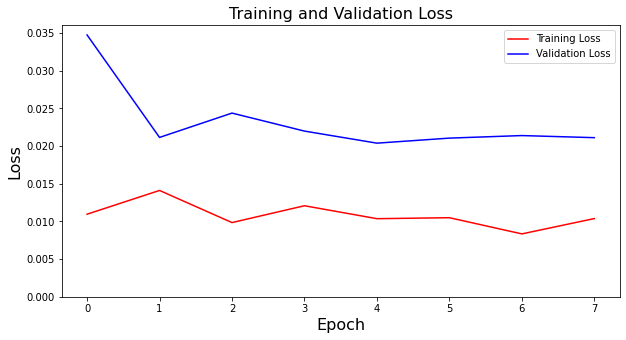

In [38]:
RNN_model_evaluate(model)

## Show Prediction

In [45]:
def show_prediction(model, dataframe, X_train, X_test, y_train, y_test, lookback=1, plot=True):
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)
  train_predict = scaler_train.inverse_transform(train_predict)
  test_predict = scaler_test.inverse_transform(test_predict) 
  y_train = scaler_train.inverse_transform(y_train)
  y_test = scaler_test.inverse_transform(y_test)
  RMSE_train = np.sqrt(mean_squared_error(y_train, train_predict))
  RMSE_test = np.sqrt(mean_squared_error(y_test, test_predict))
  print("############### Loss ###############")
  print("RMSE Train: ", RMSE_train, "\nRMSE Test: ", RMSE_test)

  train_prediction_df = dataframe[lookback:position]
  train_prediction_df["Predicted"] = train_predict
  print("############### Train Predictoion Head ###############")
  print(train_prediction_df.head())

  test_prediction_df = dataframe[position+lookback:]
  test_prediction_df["Predicted"] = test_predict
  print("############### Test Predictoion Head ###############")
  print(test_prediction_df.head())

  if plot:
    plt.figure(figsize=(14,5))
    plt.plot(dataframe, label="Real Number of Passengers")
    plt.plot(train_prediction_df["Predicted"], color="blue", label="Train Predicted Number of Passengers")
    plt.plot(test_prediction_df["Predicted"], color="red", label="Test Predicted Number of Passengers")
    plt.title("Number of Passengers Prediction")
    plt.xlabel("Time")
    plt.ylabel("Number of Passengers")
    plt.legend()
    plt.show()

2/2 [==============================] - 0s 5ms/step
############### Loss ###############
RMSE Train:  25.018402057716337 
RMSE Test:  46.63530676173582
############### Train Predictoion Head ###############
            Passengers   Predicted
Month                             
1949-02-01         118  138.801529
1949-03-01         132  142.050598
1949-04-01         129  152.522461
1949-05-01         121  149.893250
1949-06-01         135  143.878998
############### Test Predictoion Head ###############
            Passengers   Predicted
Month                             
1957-02-01         301  340.233887
1957-03-01         356  332.724121
1957-04-01         348  374.116791
1957-05-01         355  367.105530
1957-06-01         422  373.240417


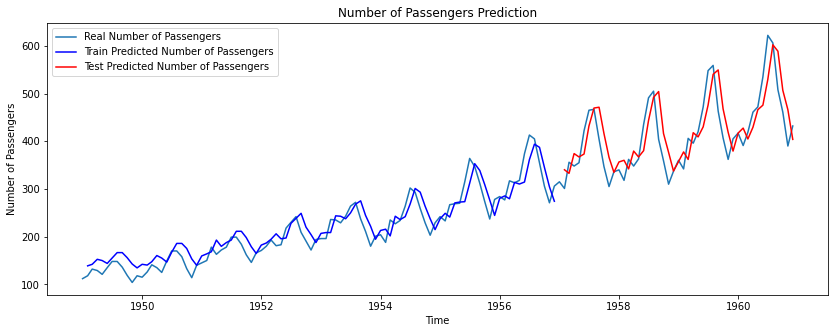

In [46]:
show_prediction(model, df, X_train, X_test, y_train, y_test)

# Long Short Term Memory(LSTM)

## Business Problem

📌 We will predict future stock prices by looking at Tesla's stock prices in the past.

## Dataset Story

📌 Click this <a href="https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020">link</a> to download the dataset and get more information.

**Variables:**

Date: Represents the date of the relevant Transaction Day.

Open: Represents the initial share price of the relevant Trading Day.

High: Represents the highest price of the relevant Trading Day.

Low: It represents the lowest price of the relevant trading day.

Close: It represents the closing price of the stock on the relevant trading day.

Adj Close: Represents the adjusted closing price of the stock of the relevant trading day.

Volume: It represents the trading volume information of the relevant trading day.

## Import Necessary Libraries

In [49]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Import Dataset

In [50]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## General Information About to the Dataset

In [51]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [52]:
check_df(df)

######################### Head #########################
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
######################### Tail #########################
            Date        Open        High         Low       Close   Adj Close    Volume
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024  11788500
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990  17801500
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998  29005700
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007  15719300
2

## Data Preparation

In [54]:
df["Date"] = pd.to_datetime(df["Date"])
tesla_df = df[["Date", "Close"]]
tesla_df.index = tesla_df["Date"]
tesla_df.drop("Date", axis=1, inplace=True)
tesla_df.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [59]:
result_df = tesla_df.copy()
tesla_df = tesla_df.values
tesla_df = tesla_df.astype("float32")
tesla_df[0:5]

array([[23.89],
       [23.83],
       [21.96],
       [19.2 ],
       [16.11]], dtype=float32)

## Data Visualization

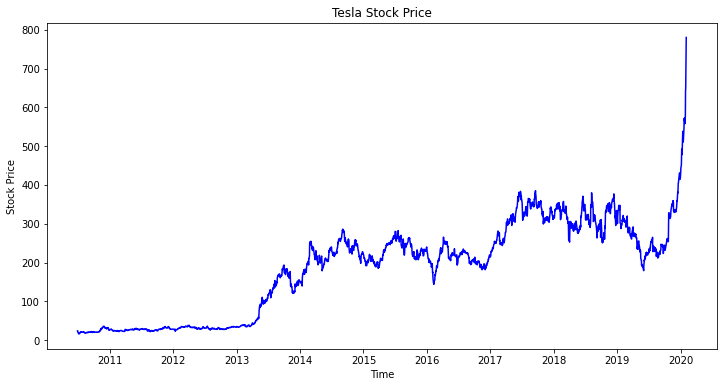

In [62]:
plt.figure(figsize=(12,6))
plt.plot(result_df["Close"], color="blue")
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Tesla Stock Price")
plt.show()

## Train and Test Split

In [63]:
def split_data(dataframe, test_size):
  position = int(round(len(dataframe) * (1-test_size)))
  train = dataframe[:position]
  test = dataframe[position:]
  return train, test, position

In [64]:
train, test, position = split_data(tesla_df, 0.20)
print("Train shape:", train.shape, " Test shape:", test.shape)

Train shape: (1933, 1)  Test shape: (483, 1)


## Encoding Scaling

In [65]:
def encoding_scaling(train, test):
  scaler_train = MinMaxScaler(feature_range=(0,1))
  train = scaler_train.fit_transform(train)
  scaler_test = MinMaxScaler(feature_range=(0,1))
  test = scaler_test.fit_transform(test)
  return scaler_train, train, scaler_test, test

In [67]:
scaler_train, train, scaler_test, test = encoding_scaling(train, test)

## Create Features

In [68]:
def create_features(data, lookback):
  X, Y = [], []
  for i in range(lookback, len(data)):
    X.append(data[i-lookback:i,0])
    Y.append(data[i,0])
  return np.array(X), np.array(Y)

In [69]:
lookback=20
X_train, y_train = create_features(train, lookback)
X_test, y_test = create_features(test, lookback)
print("X_train shape:", X_train.shape, " y_train shape:", y_train.shape, "\nX_test shape:", X_test.shape, " y_test shape: ", y_test.shape)

X_train shape: (1913, 20)  y_train shape: (1913,) 
X_test shape: (463, 20)  y_test shape:  (463,)


## LSTM Data Format

In [70]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print("X_train shape:", X_train.shape, " y_train shape:", y_train.shape, "\nX_test shape:", X_test.shape, " y_test shape: ", y_test.shape)

X_train shape: (1913, 1, 20)  y_train shape: (1913, 1) 
X_test shape: (463, 1, 20)  y_test shape:  (463, 1)


## Modeling

In [82]:
def LSTM_create_and_fit_model(X_train,y_train, X_test, y_test, lookback=20, epochs=100, summary=True, fit=True):
  model = Sequential()
  model.add(LSTM(units=50, activation="relu", input_shape=(X_train.shape[1], lookback)))
  model.add(Dropout(0.2))
  model.add(Dense(1))

  model.compile(loss="mean_squared_error", optimizer="adam")
  callbacks = [EarlyStopping(monitor="val_loss", patience=3, verbose=1, mode="min"), 
              ModelCheckpoint(filepath="mymodel.h5", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=False, verbose=1)]
  
  if summary:
    model.summary()
  
  if fit:
    history = model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=20, 
                      validation_data=(X_test, y_test), callbacks=callbacks, shuffle=False)
  
  return model, history

In [83]:
model, history = LSTM_create_and_fit_model(X_train,y_train, X_test, y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                14200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14,251
Trainable params: 14,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
72/96 [=====================>........] - ETA: 0s - loss: 0.0078
Epoch 1: val_loss improved from inf to 0.00429, saving model to mymodel.h5
96/96 [==============================] - 2s 5ms/step - loss: 0.0085 - val_loss: 0.0043
Epoch 2/100
89/96 [==========================>...] - ETA: 0s - loss: 0.0058


## Evaluation

In [84]:
def LSTM_model_evaluate(model):
  loss = model.evaluate(X_test, y_test, batch_size=20)
  print("Test Loss: %.2f" % (100 * loss))
  plt.figure(figsize=(10,5))
  plt.plot(history.history["loss"], color="r", label="Training Loss")
  plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
  plt.legend(loc="upper right")
  plt.xlabel("Epoch", fontsize=16)
  plt.ylabel("Loss", fontsize=16)
  plt.ylim([0, max(plt.ylim())])
  plt.title("Training and Validation Loss", fontsize=16);

24/24 [==============================] - 0s 1ms/step - loss: 0.0023
Test Loss: 0.23


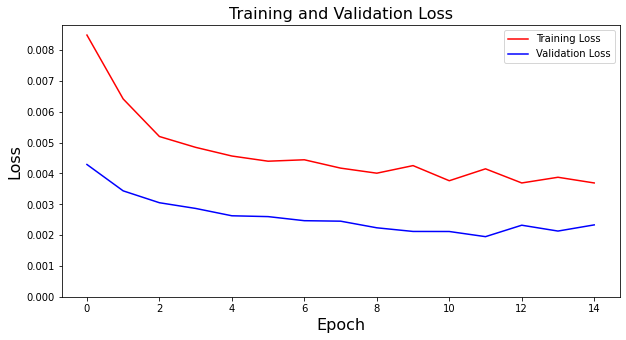

In [85]:
LSTM_model_evaluate(model)

## Show Prediction

In [86]:
def show_prediction(model, dataframe, X_train, X_test, y_train, y_test, lookback=20, plot=True):
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)
  train_predict = scaler_train.inverse_transform(train_predict)
  test_predict = scaler_test.inverse_transform(test_predict) 
  y_train = scaler_train.inverse_transform(y_train)
  y_test = scaler_test.inverse_transform(y_test)
  RMSE_train = np.sqrt(mean_squared_error(y_train, train_predict))
  RMSE_test = np.sqrt(mean_squared_error(y_test, test_predict))
  print("############### Loss ###############")
  print("RMSE Train: ", RMSE_train, "\nRMSE Test: ", RMSE_test)

  train_prediction_df = dataframe[lookback:position]
  train_prediction_df["Predicted"] = train_predict
  print("############### Train Predictoion Head ###############")
  print(train_prediction_df.head())

  test_prediction_df = dataframe[position+lookback:]
  test_prediction_df["Predicted"] = test_predict
  print("############### Test Predictoion Head ###############")
  print(test_prediction_df.head())

  if plot:
    plt.figure(figsize=(14,5))
    plt.plot(dataframe, label="Real Number of Passengers")
    plt.plot(train_prediction_df["Predicted"], color="blue", label="Train Predicted Stock Price")
    plt.plot(test_prediction_df["Predicted"], color="red", label="Test Predicted Stock Price")
    plt.title("Tesla Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

15/15 [==============================] - 0s 1ms/step
############### Loss ###############
RMSE Train:  13.149905 
RMSE Test:  29.028118
############### Train Predictoion Head ###############
                Close  Predicted
Date                            
2010-07-28  20.719999  36.124195
2010-07-29  20.350000  36.124195
2010-07-30  19.940001  36.124195
2010-08-02  20.920000  36.124195
2010-08-03  21.950001  36.124195
############### Test Predictoion Head ###############
                 Close   Predicted
Date                              
2018-04-03  267.529999  317.062378
2018-04-04  286.940002  313.692871
2018-04-05  305.720001  313.866455
2018-04-06  299.299988  314.362122
2018-04-09  289.660004  314.013000


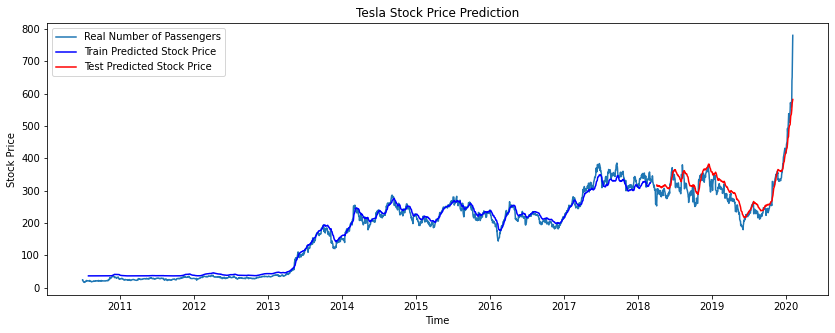

In [87]:
show_prediction(model, result_df, X_train, X_test, y_train, y_test)